# **ENGG680 - Introduction to Digital Engineering**

# Term Project : Time-Scheduled Auto Lock System for Convenience Store Security & Employee Attendance Enhancement

# GROUP 6

# Preliminary: Certificate of Work

## *We, the undersigned, certify that this is our own work, which has been done expressly for this course, either without the assistance of any other party or where appropriate we have acknowledged the work of others. Further, we have read and understood the section in the university calendar on plagiarism/cheating/other academic misconduct and we are aware of the implications thereof. We request that the total mark for this assignment be distributed as follows among group members:*

|          | First Name | Last Name | Signature | Hours | Contribution % |
|----------|------------|-----------|-----------------------------|-------|----------------|
| Member 1: | Amanda  | Choy | Amanda Choy | 10 | 12.5% |
| Member 2: | David | Ebede | David Ebede | 10| 12.5% |
| Member 3: | Di | Su | Di Su | 10 | 12.5% |
| Member 4: | Htike Htike | Htoo | Htike Htike Htoo | 10 | 12.5% |
| Member 5: | Jeelkumar | Patel | Jeelkumar Patel | 10 | 12.5%  |
| Member 6: | May Thinzar| Khine | May Khine | 10 | 12.5%  |
| Member 7: | Nathaniel | Lamptey | Nathaniel Lamptey | 10 | 12.5%  |
| Member 8: | Su Mun | Thet | Su Mun Thet | 10 | 12.5%  |

# **PART 1**

# Employee Attendance Management with Anomalies Analysis

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pandas
import pandas as pd

# Loading the data file
file_path = '/content/drive/MyDrive/Project/Files/MyDrive/My_Modules/12 month updated_schedule_with_anomalous_clockins.xlsx'

# Read the xlsx file into a pandas DataFrame
data = pd.read_excel(file_path)

print(data[["Scheduled Start Time", "Scheduled End Time", "Clock-In"]].info())
print(data[["Scheduled Start Time", "Scheduled End Time", "Clock-In"]].head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7440 entries, 0 to 7439
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Scheduled Start Time  3588 non-null   object
 1   Scheduled End Time    3540 non-null   object
 2   Clock-In              3555 non-null   object
dtypes: object(3)
memory usage: 174.5+ KB
None
  Scheduled Start Time Scheduled End Time  Clock-In
0                  NaN                NaN       NaN
1             18:30:00           22:00:00  17:56:28
2                  NaN                NaN       NaN
3             14:00:00           20:00:00  13:25:12
4                  NaN                NaN       NaN


In [ ]:
cleaned_data = data.dropna(subset=["Scheduled Start Time", "Scheduled End Time", "Clock-In"]).copy()


In [ ]:
# Fill missing times with a default value (00:00:00) for demonstration purposes
default_time = "00:00:00"
data.fillna(default_time, inplace=True)

In [ ]:
for col in ["Scheduled Start Time", "Scheduled End Time", "Clock-In"]:
    data[col] = pd.to_datetime(data[col], format="%H:%M:%S", errors="coerce").dt.time

In [ ]:
from datetime import datetime, timedelta

def detect_anomalies(row):
    # Check for missing or invalid times
    if pd.isna(row["Scheduled Start Time"]) or pd.isna(row["Scheduled End Time"]) or pd.isna(row["Clock-In"]):
        return "Invalid Time Data"

    # Extract scheduled and actual times with the correct date
    record_date = row["Date"]
    scheduled_start = datetime.combine(record_date, row["Scheduled Start Time"])
    scheduled_end = datetime.combine(record_date, row["Scheduled End Time"])
    clock_in = datetime.combine(record_date, row["Clock-In"])

    # Define restricted hours
    restricted_start = datetime.combine(record_date, datetime.strptime("23:01:00", "%H:%M:%S").time())
    restricted_end = datetime.combine(record_date + timedelta(days=1), datetime.strptime("07:00:00", "%H:%M:%S").time())

    # Check for anomalies
    if clock_in < scheduled_start - timedelta(minutes=90) or clock_in > scheduled_end + timedelta(minutes=60):
        return "Check-in Outside Allowed Range"
    elif restricted_start <= clock_in <= restricted_end:
        return "Check-in During Restricted Hours"
    return "Normal"

In [ ]:
data["Anomalies"] = data.apply(detect_anomalies, axis=1)


In [ ]:
import pandas as pd
from datetime import datetime, timedelta

# Clean the data by dropping rows with missing times in key columns
data = data.dropna(subset=["Scheduled Start Time", "Scheduled End Time", "Clock-In"]).copy()

# Ensure the time columns are in the correct format
for col in ["Scheduled Start Time", "Scheduled End Time", "Clock-In"]:
    data[col] = pd.to_datetime(data[col], format="%H:%M:%S", errors="coerce").dt.time

# Define the anomaly detection function
def detect_anomalies(row):
    if pd.isna(row["Scheduled Start Time"]) or pd.isna(row["Scheduled End Time"]) or pd.isna(row["Clock-In"]):
        return "Invalid Time Data"

    # Extract scheduled and actual times with the correct date
    record_date = row["Date"]
    scheduled_start = datetime.combine(record_date, row["Scheduled Start Time"])
    scheduled_end = datetime.combine(record_date, row["Scheduled End Time"])
    clock_in = datetime.combine(record_date, row["Clock-In"])

    # Define restricted hours
    restricted_start = datetime.combine(record_date, datetime.strptime("23:01:00", "%H:%M:%S").time())
    restricted_end = datetime.combine(record_date + timedelta(days=1), datetime.strptime("07:00:00", "%H:%M:%S").time())

    # Check for anomalies
    if clock_in < scheduled_start - timedelta(minutes=90) or clock_in > scheduled_end + timedelta(minutes=60):
        return "Check-in Outside Allowed Range"
    elif restricted_start <= clock_in <= restricted_end:
        return "Check-in During Restricted Hours"
    return "Normal"

# Apply anomaly detection to the data
data["Anomalies"] = data.apply(detect_anomalies, axis=1)

# Display the updated data with anomalies
print(data[["Date", "Scheduled Start Time", "Scheduled End Time", "Clock-In", "Anomalies"]])

           Date Scheduled Start Time Scheduled End Time  Clock-In Anomalies
0    2024-10-01             00:00:00           00:00:00  00:00:00    Normal
1    2024-10-01             18:30:00           22:00:00  17:56:28    Normal
2    2024-10-01             00:00:00           00:00:00  00:00:00    Normal
3    2024-10-01             14:00:00           20:00:00  13:25:12    Normal
4    2024-10-01             00:00:00           00:00:00  00:00:00    Normal
...         ...                  ...                ...       ...       ...
7435 2025-10-01             16:00:00           22:00:00  16:36:49    Normal
7436 2025-10-01             00:00:00           00:00:00  00:00:00    Normal
7437 2025-10-01             15:30:00           22:00:00  16:22:22    Normal
7438 2025-10-01             16:00:00           22:00:00  15:53:03    Normal
7439 2025-10-01             00:00:00           00:00:00  00:00:00    Normal

[7440 rows x 5 columns]


In [ ]:
# Save the results to an Excel file
output_file = "/content/drive/MyDrive/Project/Files/MyDrive/My_Modules/Anomalies_Detected_Results_1.xlsx"
data.to_excel(output_file, index=False)

print(f"Anomaly detection results saved to {output_file}")

Anomaly detection results saved to /content/drive/MyDrive/Project/Files/MyDrive/My_Modules/Anomalies_Detected_Results_1.xlsx


In [ ]:
print(data[data['Employee Name'] == 'Tyler'])

           Date Employee Name Employee ID  Designation Scheduled Start Time  \
12   2024-10-01         Tyler      EMP015  Store Clerk             14:00:00   
32   2024-10-02         Tyler      EMP015  Store Clerk             00:00:00   
52   2024-10-03         Tyler      EMP015  Store Clerk             14:00:00   
72   2024-10-04         Tyler      EMP015  Store Clerk             14:00:00   
92   2024-10-05         Tyler      EMP015  Store Clerk             00:00:00   
...         ...           ...         ...          ...                  ...   
7352 2025-09-27         Tyler      EMP015  Store Clerk             00:00:00   
7372 2025-09-28         Tyler      EMP015  Store Clerk             00:00:00   
7392 2025-09-29         Tyler      EMP015  Store Clerk             14:00:00   
7412 2025-09-30         Tyler      EMP015  Store Clerk             00:00:00   
7432 2025-10-01         Tyler      EMP015  Store Clerk             14:00:00   

     Scheduled End Time  Clock-In Clock-Out  Is Lat

In [ ]:
print(data[data['Employee Name'] == 'Tyler']['Clock-In'].isna())

12      False
32      False
52      False
72      False
92      False
        ...  
7352    False
7372    False
7392    False
7412    False
7432    False
Name: Clock-In, Length: 360, dtype: bool


In [ ]:
anomalies_detected = data[data['Anomalies'] != 'Normal']
# Filter data for anomalies (Anomalies not equal to 'Normal')

tyler_data = anomalies_detected[anomalies_detected['Employee Name'] == 'Tyler']
print(tyler_data[['Date', 'Clock-In']].duplicated())

1332    False
2612    False
3072    False
3132    False
dtype: bool


In [ ]:
import numpy as np

# Create 'y_position' using .loc to avoid the warning
if 'y_position' not in anomalies_detected.columns:
    anomalies_detected.loc[:, 'y_position'] = 0  # Initialize with 0

# Add jitter using .loc to avoid the warning
anomalies_detected.loc[:, 'y_position'] += np.random.uniform(-0.1, 0.1, len(anomalies_detected))

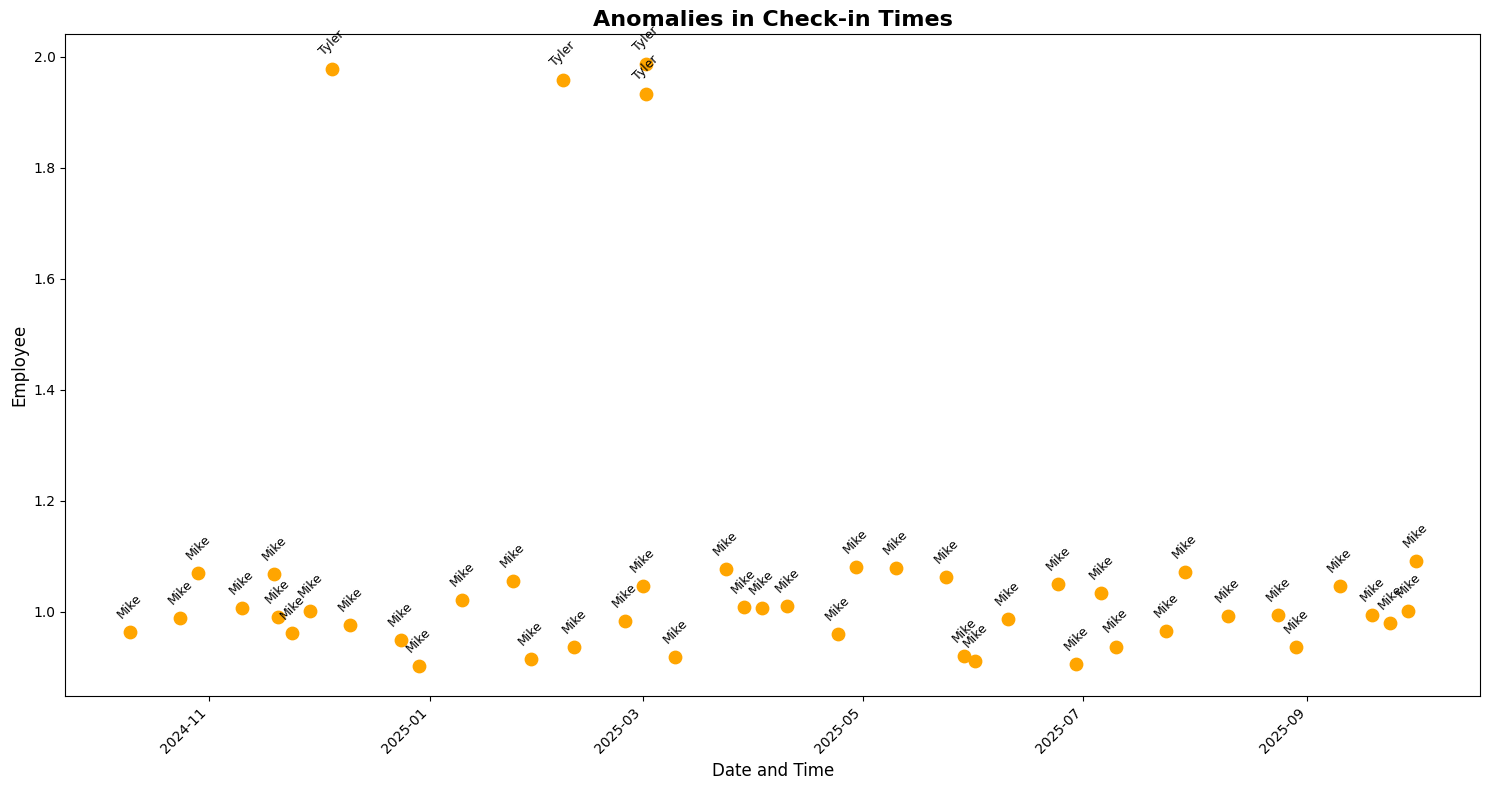

In [ ]:
import matplotlib.patches as mpatches  # Import for creating manual legend patches
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import numpy as np

# Create a mapping of employees to unique y_positions (without jittering)
unique_employees = anomalies_detected['Employee Name'].unique()
employee_y_mapping = {employee: i + 1 for i, employee in enumerate(unique_employees)}

# Use .loc for assignment to avoid SettingWithCopyWarning
anomalies_detected.loc[:, 'y_position'] = anomalies_detected['Employee Name'].map(employee_y_mapping)

# Add jitter only for plotting, using .loc
anomalies_detected.loc[:, 'y_jittered'] = anomalies_detected['y_position'] + np.random.uniform(-0.1, 0.1, len(anomalies_detected))

# Re-plot the graph
fig, ax = plt.subplots(figsize=(15, 8))

# Plot anomalies with jittered y positions
# Change 'Datetime' to 'Date' since the column is named 'Date' in the DataFrame
for _, row in anomalies_detected.iterrows():
    ax.scatter(row["Date"], row["y_jittered"], color="orange", s=80)
    ax.annotate(row["Employee Name"], (row["Date"], row["y_jittered"]), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=9, rotation=45)

# Formatting
ax.set_title("Anomalies in Check-in Times", fontsize=16, weight="bold")
ax.set_xlabel("Date and Time", fontsize=12)
ax.set_ylabel("Employee", fontsize=12)
# ax.xaxis.set_major_locator(mdates.HourLocator(interval=960))
# ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d %H:%M'))
plt.xticks(rotation=45, ha="right", fontsize=10)

plt.tight_layout()
plt.show()

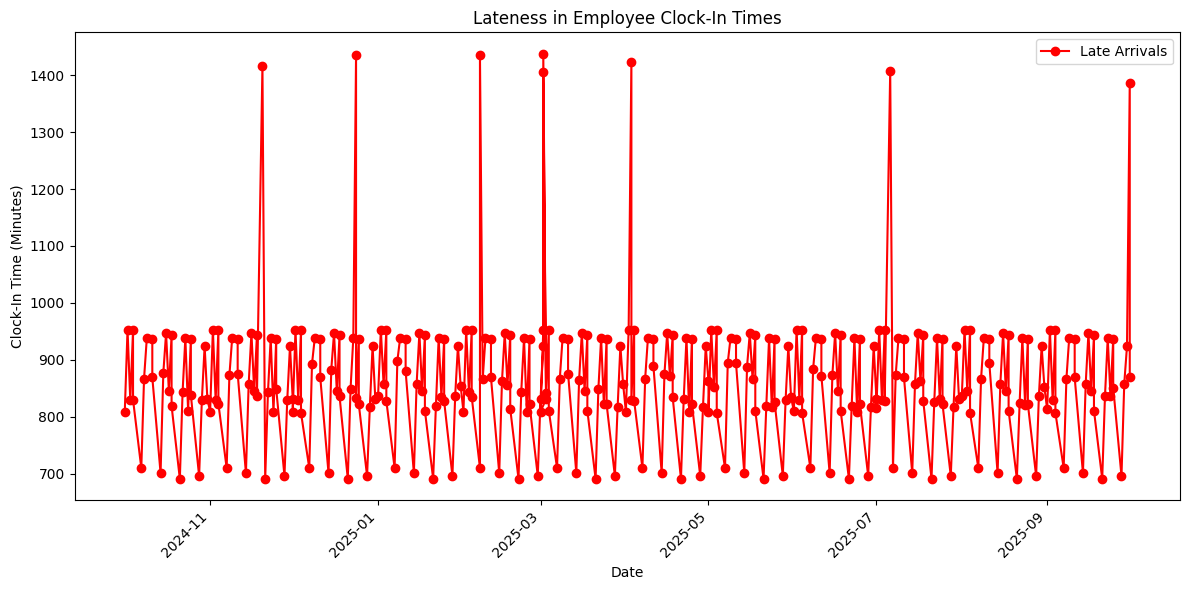

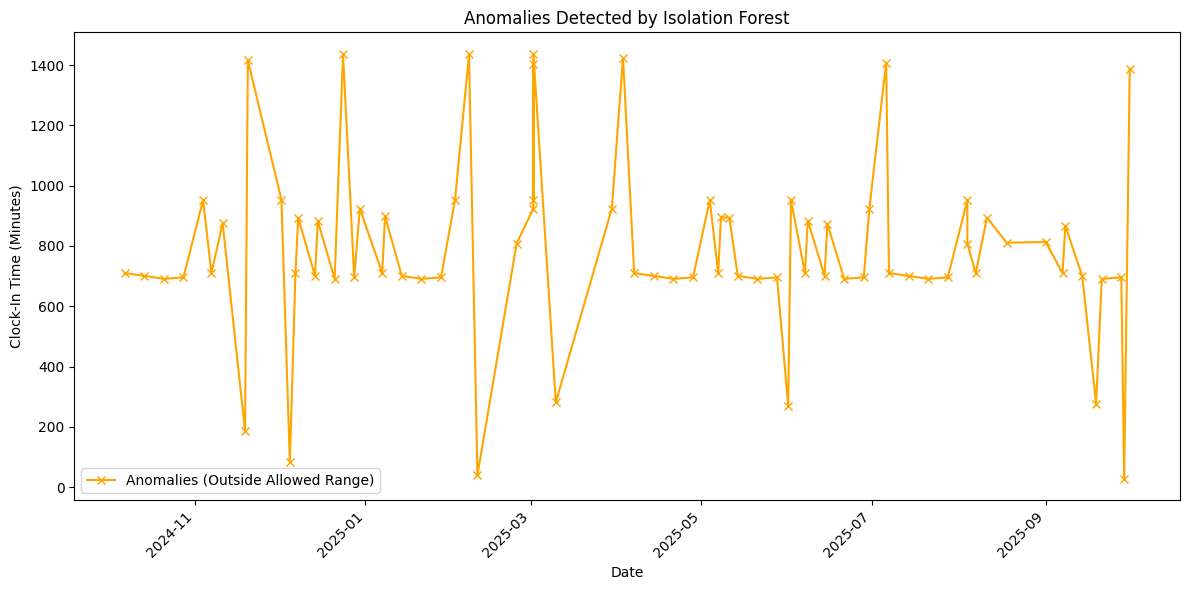

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder
from datetime import datetime

# Loading the dataset
data_path = "/content/drive/MyDrive/Project/Files/MyDrive/My_Modules/Anomalies_Detected_Results_1.xlsx"
data = pd.read_excel(data_path)

# Feature engineering: Convert clock-in time to minutes since midnight
data['Clock-In (Minutes)'] = data['Clock-In'].apply(lambda x: int(x.split(':')[0]) * 60 + int(x.split(':')[1]))

# Filter data for Mike and Tyler
data_filtered = data[data['Employee Name'].isin(['Mike', 'Tyler'])].copy()

# Define "Late" based on a specific threshold
late_threshold = 9 * 60  # 9:00 AM in minutes
data_filtered.loc[:,'Late'] = data_filtered['Clock-In (Minutes)'] > late_threshold

# Label encoding for Employee ID
label_encoder = LabelEncoder()
data_filtered.loc[:, 'Employee ID Encoded'] = label_encoder.fit_transform(data_filtered['Employee ID'])

# Train Isolation Forest for anomaly detection
features = ['Clock-In (Minutes)', 'Day of Week', 'Employee ID Encoded']
data_filtered.loc[:, 'Day of Week'] = pd.to_datetime(data_filtered['Date']).dt.dayofweek  # Add day of the week as a feature
iso_forest = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)
data_filtered.loc[:, 'Anomaly Score'] = iso_forest.fit_predict(data_filtered[features])

# Add anomaly labels (1 = normal, -1 = anomaly)
data_filtered.loc[:, 'Anomaly'] = data_filtered['Anomaly Score'].apply(lambda x: 'Normal' if x == 1 else 'Anomalous')

# Separate data for lateness and anomalies
late_data = data_filtered[data_filtered['Late'] == True]
anomalous_data = data_filtered[data_filtered['Anomaly'] == 'Anomalous']

# Plotting Lateness (Model 1)
plt.figure(figsize=(12, 6))
plt.plot(late_data['Date'], late_data['Clock-In (Minutes)'], color='red', label='Late Arrivals', linestyle='-', marker='o')
plt.xlabel('Date')
plt.ylabel('Clock-In Time (Minutes)')
plt.title('Lateness in Employee Clock-In Times')
plt.legend()
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.tight_layout()
plt.show()

# Plotting Anomalies (Model 2)
plt.figure(figsize=(12, 6))
plt.plot(anomalous_data['Date'], anomalous_data['Clock-In (Minutes)'], color='orange', label='Anomalies (Outside Allowed Range)', linestyle='-', marker='x')
plt.xlabel('Date')
plt.ylabel('Clock-In Time (Minutes)')
plt.title('Anomalies Detected by Isolation Forest')
plt.legend()
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.tight_layout()
plt.show()

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from datetime import datetime
import matplotlib.pyplot as plt

# Loading the dataset
data_path = "/content/drive/MyDrive/Project/Files/MyDrive/My_Modules/Anomalies_Detected_Results_1.xlsx"
data = pd.read_excel(data_path)

# Feature engineering: Convert clock-in time to minutes since midnight
data['Clock-In (Minutes)'] = data['Clock-In'].apply(lambda x: int(x.split(':')[0]) * 60 + int(x.split(':')[1]))

# Filter data for Mike and Tyler
data_filtered = data[data['Employee Name'].isin(['Mike', 'Tyler'])].copy()

# Define "Late" based on a specific threshold (after 9:00 AM)
late_threshold = 9 * 60  # 9:00 AM in minutes
data_filtered.loc[:, 'Late'] = data_filtered['Clock-In (Minutes)'] > late_threshold

# Label encoding for Employee ID
label_encoder = LabelEncoder()
data_filtered.loc[:, 'Employee ID Encoded'] = label_encoder.fit_transform(data_filtered['Employee ID'])

# Train Isolation Forest for anomaly detection
features = ['Clock-In (Minutes)', 'Day of Week', 'Employee ID Encoded']
data_filtered.loc[:, 'Day of Week'] = pd.to_datetime(data_filtered['Date']).dt.dayofweek  # Add day of the week as a feature
iso_forest = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)
data_filtered.loc[:, 'Anomaly Score'] = iso_forest.fit_predict(data_filtered[features])

# Add anomaly labels (1 = normal, -1 = anomaly)
data_filtered.loc[:, 'Anomaly'] = data_filtered['Anomaly Score'].apply(lambda x: 'Normal' if x == 1 else 'Anomalous')

# Add Ground Truth column for evaluation
data_filtered.loc[:, 'Ground Truth'] = data_filtered['Late'].apply(lambda x: 'Anomalous' if x else 'Normal')

# Calculate accuracy, precision, recall, and F1-score
true_labels = data_filtered['Ground Truth'].apply(lambda x: 1 if x == 'Normal' else -1)
predicted_labels = data_filtered['Anomaly Score']

accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels, pos_label=1)
recall = recall_score(true_labels, predicted_labels, pos_label=1)
f1 = f1_score(true_labels, predicted_labels, pos_label=1)

# Display results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("\nClassification Report:\n", classification_report(true_labels, predicted_labels))

Accuracy: 0.644808743169399
Precision: 0.6155015197568389
Recall: 0.9830097087378641
F1-Score: 0.7570093457943925

Classification Report:
               precision    recall  f1-score   support

          -1       0.91      0.21      0.34       320
           1       0.62      0.98      0.76       412

    accuracy                           0.64       732
   macro avg       0.76      0.60      0.55       732
weighted avg       0.74      0.64      0.57       732



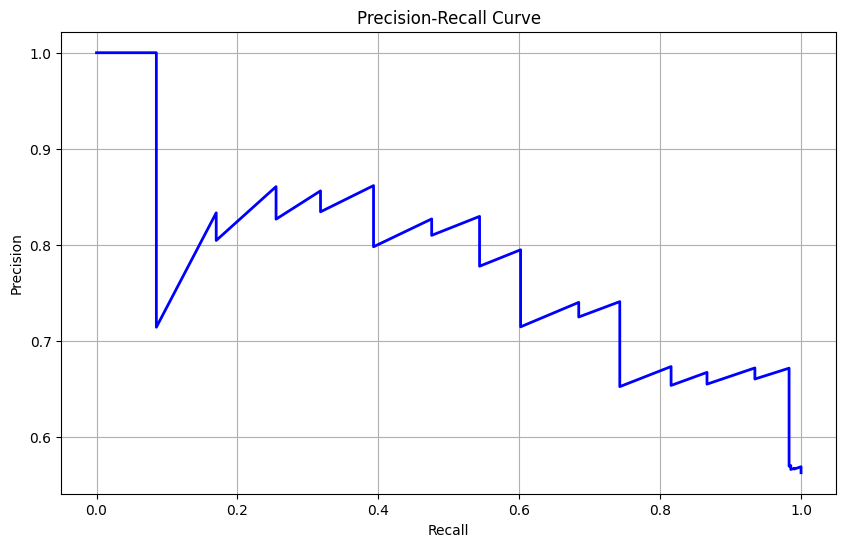

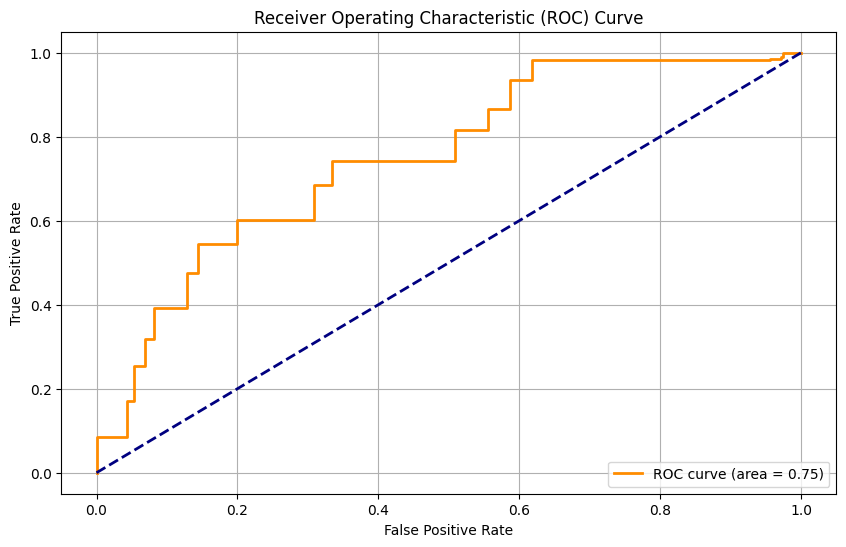

In [ ]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc
import matplotlib.pyplot as plt

# Ground truth and predictions
true_labels = data_filtered['Ground Truth'].apply(lambda x: 1 if x == 'Normal' else -1)
predicted_scores = iso_forest.decision_function(data_filtered[['Clock-In (Minutes)', 'Day of Week', 'Employee ID Encoded']])

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(true_labels.replace(-1, 0), predicted_scores)
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid(True)
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(true_labels.replace(-1, 0), predicted_scores)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

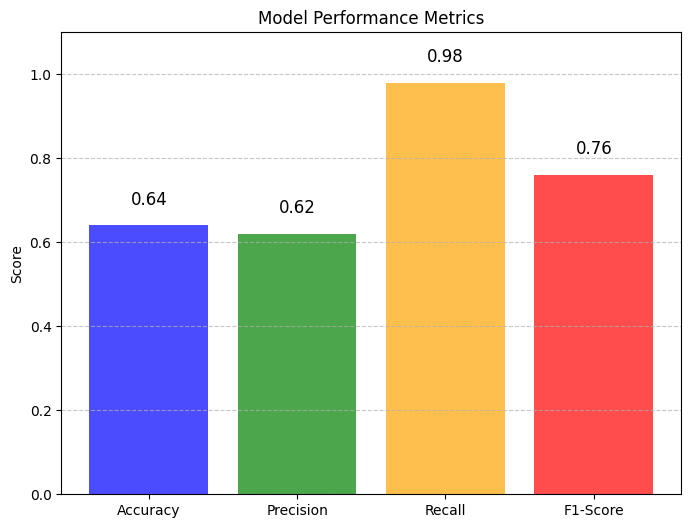

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

accuracy = 0.64
precision = 0.62
recall = 0.98
f1 = 0.76

# Ensure all metrics are scalar values
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy, precision, recall, f1]

# Create the bar plot
plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'], alpha=0.7)

# Add labels and title
plt.ylim(0, 1.1)  # Set the y-axis limit to go slightly above 1 for clarity
plt.ylabel('Score')
plt.title('Model Performance Metrics')
for i, v in enumerate(values):
    plt.text(i, v + 0.05, f"{v:.2f}", ha='center', fontsize=12)

# Show the grid
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Use labeled data
X = data_filtered[['Clock-In (Minutes)', 'Day of Week', 'Employee ID Encoded']]
y = data_filtered['Ground Truth'].apply(lambda x: 1 if x == 'Normal' else 0)  # Binary encoding for target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        89
           1       1.00      1.00      1.00       131

    accuracy                           1.00       220
   macro avg       1.00      1.00      1.00       220
weighted avg       1.00      1.00      1.00       220



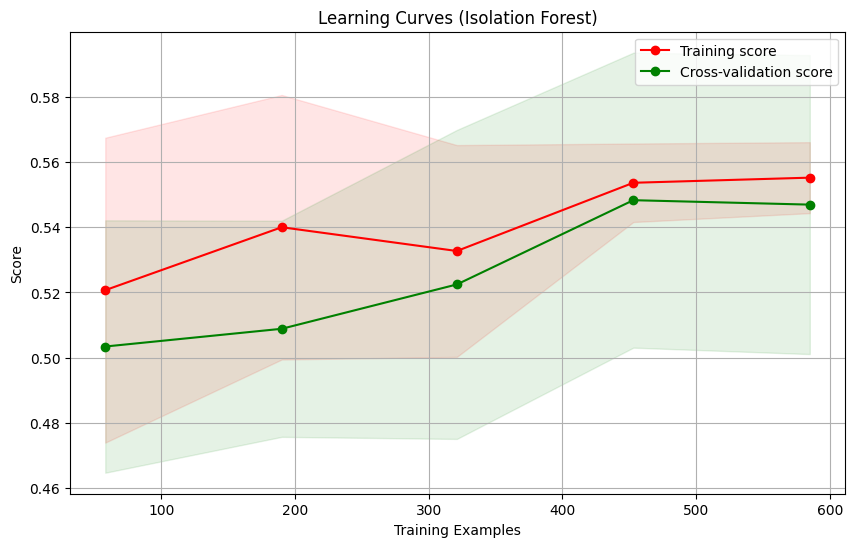

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
import numpy as np

# Define a function to plot learning curves
def plot_learning_curve(estimator, X, y, title="Learning Curves", cv=None, scoring="accuracy"):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Training Examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, scoring=scoring, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5)
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    plt.show()

# usage with a generic model
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder

# Prepare features
features = ['Clock-In (Minutes)', 'Day of Week', 'Employee ID Encoded']
label_encoder = LabelEncoder()
data_filtered['Employee ID Encoded'] = label_encoder.fit_transform(data_filtered['Employee ID'])
X = data_filtered[features]
y = data_filtered['Ground Truth'].apply(lambda x: 1 if x == 'Normal' else 0)

# Isolation Forest model
iso_forest = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)

# Cross-validation split
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

# Plot learning curves
plot_learning_curve(iso_forest, X, y, title="Learning Curves (Isolation Forest)", cv=cv)

In [ ]:
import pandas as pd

# File path for the dataset
file_path = '/content/drive/MyDrive/Project/Files/MyDrive/My_Modules/Anomalies_Detected_Results_1.xlsx'

# Reading the Excel file
data = pd.read_excel(file_path, engine='openpyxl')

# Display the first few rows to confirm successful load
print(data.head())

        Date Employee Name Employee ID            Designation  \
0 2024-10-01         Alice      EMP001                Cleaner   
1 2024-10-01          John      EMP031                Cashier   
2 2024-10-01      Bradley       EMP024                Manager   
3 2024-10-01        Celine      EMP006            Store Clerk   
4 2024-10-01          Mike      EMP013  STOCKER/SALES/CASHIER   

  Scheduled Start Time Scheduled End Time  Clock-In Clock-Out  Is Late  \
0             00:00:00           00:00:00  00:00:00  00:00:00    False   
1             18:30:00           22:00:00  17:56:28  22:05:18    False   
2             00:00:00           00:00:00  00:00:00  00:00:00    False   
3             14:00:00           20:00:00  13:25:12  20:10:44    False   
4             00:00:00           00:00:00  00:00:00  00:00:00    False   

  Anomalies  
0    Normal  
1    Normal  
2    Normal  
3    Normal  
4    Normal  


In [ ]:
import pandas as pd
from datetime import datetime

# Load the dataset
file_path = '/content/drive/MyDrive/Project/Files/MyDrive/My_Modules/Anomalies_Detected_Results_1.xlsx'
data = pd.read_excel(file_path)

# Function to check for latecomers
def check_late_comer(row):
    try:
        # Debugging print statements to inspect the values
        print(f"Employee: {row['Employee Name']}, Scheduled Start: {row['Scheduled Start Time']}, Clock-In: {row['Clock-In']}")

        if pd.isna(row["Scheduled Start Time"]) or pd.isna(row["Clock-In"]):
            return "Invalid Data"  # Skip rows with missing time values

        # Convert Scheduled Start Time and Clock-In time to datetime.time for comparison
        scheduled_start = datetime.strptime(str(row["Scheduled Start Time"]), "%H:%M:%S").time()
        clock_in = datetime.strptime(str(row["Clock-In"]), "%H:%M:%S").time()

        # Print out the parsed times to debug
        print(f"Parsed Times - Scheduled Start: {scheduled_start}, Clock-In: {clock_in}")

        # If Clock-In is later than Scheduled Start Time, mark as 'Late'
        if clock_in > scheduled_start:
            return "Late"
        else:
            return "On Time"
    except Exception as e:
        # Catch any other errors and return "Invalid Data"
        print(f"Error processing row for {row['Employee Name']}: {e}")
        return "Invalid Data"

# Apply the function to check latecomers
data['Late Comer Status'] = data.apply(check_late_comer, axis=1)

# Filter the latecomers
late_comers = data[data['Late Comer Status'] == 'Late']

# Display the latecomers' details
print(late_comers[['Employee Name', 'Date', 'Clock-In', 'Scheduled Start Time', 'Late Comer Status']])

# Save the latecomer data to a new Excel file
# For local file save:
# late_comers.to_excel('late_comers_output.xlsx', index=False)
from google.colab import drive
drive.mount('/content/drive')

late_comers.to_excel('/content/drive/MyDrive/Project/Files/MyDrive/My_Modules/late_comers_output.xlsx', index=False)

Streaming output truncated to the last 5000 lines.
Parsed Times - Scheduled Start: 18:30:00, Clock-In: 18:19:11
Employee: Steven, Scheduled Start: 12:00:00, Clock-In: 12:08:07
Parsed Times - Scheduled Start: 12:00:00, Clock-In: 12:08:07
Employee: Amara, Scheduled Start: 00:00:00, Clock-In: 00:00:00
Parsed Times - Scheduled Start: 00:00:00, Clock-In: 00:00:00
Employee: Grace, Scheduled Start: 00:00:00, Clock-In: 00:00:00
Parsed Times - Scheduled Start: 00:00:00, Clock-In: 00:00:00
Employee: Sue, Scheduled Start: 16:00:00, Clock-In: 15:30:08
Parsed Times - Scheduled Start: 16:00:00, Clock-In: 15:30:08
Employee: Tyler, Scheduled Start: 14:00:00, Clock-In: 13:54:14
Parsed Times - Scheduled Start: 14:00:00, Clock-In: 13:54:14
Employee: Gregory, Scheduled Start: 00:00:00, Clock-In: 00:00:00
Parsed Times - Scheduled Start: 00:00:00, Clock-In: 00:00:00
Employee: Michelle, Scheduled Start: 00:00:00, Clock-In: 00:00:00
Parsed Times - Scheduled Start: 00:00:00, Clock-In: 00:00:00
Employee: Rachel

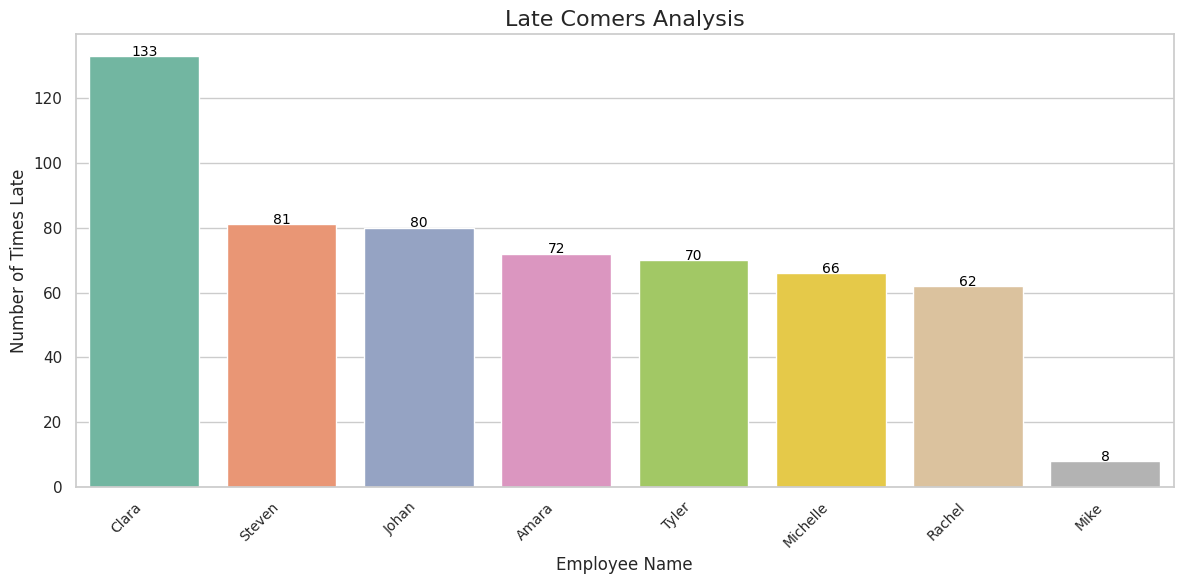

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of times each employee is late
late_comers_count = late_comers['Employee Name'].value_counts().reset_index()
late_comers_count.columns = ['Employee Name', 'Late Count']

# Sort employees by the number of times late (descending)
late_comers_count = late_comers_count.sort_values(by='Late Count', ascending=False)

# Set the seaborn style for better appearance
sns.set(style="whitegrid")

# Create the bar plot with different colors for each employee
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x='Employee Name',
    y='Late Count',
    data=late_comers_count,
    hue='Employee Name',
    palette='Set2',
    legend=False
)

# Rotate the x-axis labels for better visibility and ensure names fit
plt.xticks(
    rotation=45,
    ha='right',
    fontsize=10  # Adjust font size for better visibility
)

# Annotate each bar with the corresponding number of times late
for index, row in late_comers_count.iterrows():
    ax.text(
        index,
        row['Late Count'] + 0.1,  # Slightly above the bar
        str(row['Late Count']),
        color='black',
        ha="center",
        fontsize=10  # Adjust font size of the annotation
    )

# Add labels and title
plt.title('Late Comers Analysis', fontsize=16)
plt.xlabel('Employee Name', fontsize=12)
plt.ylabel('Number of Times Late', fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Feature engineering
data_filtered['Late'] = (data_filtered['Clock-In (Minutes)'] > late_threshold).astype(int)  # 1 for late, 0 for on-time
features = ['Employee ID Encoded', 'Day of Week', 'Clock-In (Minutes)']  # Features to predict lateness
X = data_filtered[features]
y = data_filtered['Late']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       131
           1       1.00      1.00      1.00        89

    accuracy                           1.00       220
   macro avg       1.00      1.00      1.00       220
weighted avg       1.00      1.00      1.00       220



In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv=5)  # Cross-validation with 5 folds


array([1., 1., 1., 1., 1.])

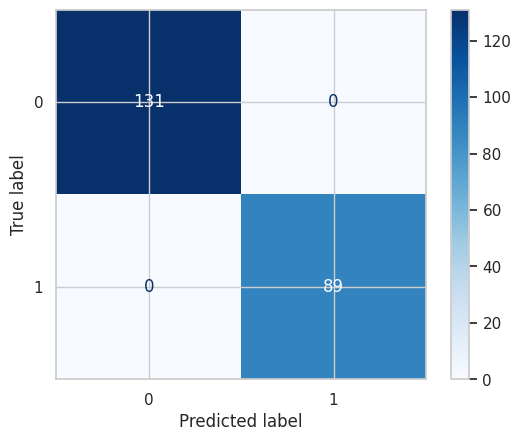

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       131
           1       1.00      1.00      1.00        89

    accuracy                           1.00       220
   macro avg       1.00      1.00      1.00       220
weighted avg       1.00      1.00      1.00       220



In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data['On Time'] = (data['Clock-In (Minutes)'] <= data['Scheduled Start Time (Minutes)']).astype(int)


In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression

# Set up the model and cross-validation
model = LogisticRegression(max_iter=1000)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')

# Output results
print("Cross-Validation Accuracy Scores:", scores)
print("Mean Accuracy:", scores.mean())
print("Standard Deviation:", scores.std())


Cross-Validation Accuracy Scores: [1. 1. 1. 1. 1.]
Mean Accuracy: 1.0
Standard Deviation: 0.0


#**PART 2**

#Anomalies Detection Analysis using Machine Learning Models

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


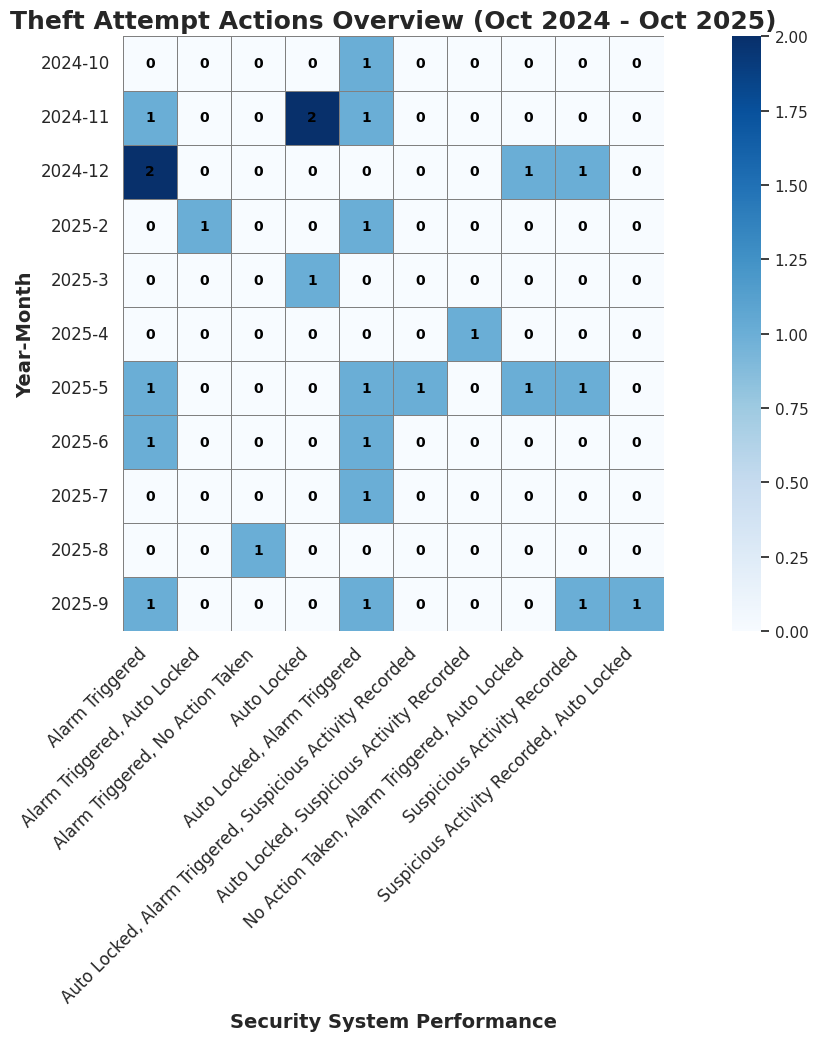

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/drive/MyDrive/Project/Files/MyDrive/My_Modules/Theft Data.xlsx'
data = pd.read_excel(file_path)

# Convert the 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Extract month and year from 'Date' for grouping
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year

# Group by 'Month', 'Actions Taken' and count the occurrences
action_counts = data.groupby(['Year', 'Month', 'Security System Performance']).size().unstack(fill_value=0)

# Set up the plot size and style for a clean professional look
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid", palette="muted")  # Clean background and muted color palette

# Create the heatmap
heatmap = sns.heatmap(action_counts, annot=True, fmt="d", cmap="Blues", cbar=True,
                      annot_kws={'size': 10, 'weight': 'bold', 'color': 'black'},  # Adjust annotation style
                      linewidths=0.5, linecolor='gray', square=True)  # Grid lines for better separation

# Titles and labels
plt.title('Theft Attempt Actions Overview (Oct 2024 - Oct 2025)', fontsize=18, weight='bold')
plt.xlabel('Security System Performance', fontsize=14, weight='bold')
plt.ylabel('Year-Month', fontsize=14, weight='bold')

# Adjust x-axis labels: Rotate for better readability and spacing
plt.xticks(rotation=45, ha='right', fontsize=12)

# Adjust y-axis labels: Ensure readability
plt.yticks(rotation=0, fontsize=12)

# Improve layout to ensure tight fitting
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)  # Add space to avoid label cut-offs

# Display the heatmap
plt.show()

In [ ]:
print(data.head())  # Show first few rows of the data
print(data.columns)  # Print all column names


        Date      Time Method of Attempt Success or Fail  \
0 2025-09-27  00:33:00       Shoplifting            Fail   
1 2024-11-27  04:56:00       Shoplifting         Success   
2 2025-05-11     09:53      Forced Entry         Success   
3 2024-10-25     14:59       Shoplifting            Fail   
4 2025-05-27  23:33:00       Shoplifting            Fail   

                 Security System Performance  Month  Year  
0  Suspicious Activity Recorded, Auto Locked      9  2025  
1                                Auto Locked     11  2024  
2                            Alarm Triggered      5  2025  
3               Auto Locked, Alarm Triggered     10  2024  
4               Auto Locked, Alarm Triggered      5  2025  
Index(['Date', 'Time', 'Method of Attempt', 'Success or Fail',
       'Security System Performance', 'Month', 'Year'],
      dtype='object')


In [ ]:
data.columns = data.columns.str.replace(' ', '_').str.replace(',', '').str.replace('(', '').str.replace(')', '')

In [ ]:
print(data.columns)

Index(['Date', 'Time', 'Method_of_Attempt', 'Success_or_Fail',
       'Security_System_Performance', 'Month', 'Year'],
      dtype='object')


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Extract day of week, month, and hour from Date and Time
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')  # Convert 'Date' to datetime
data['Time'] = pd.to_datetime(data['Time'], errors='coerce').dt.strftime('%H:%M')  # Ensure 'Time' is in proper format

# Extract features from Date and Time
data['Day_of_Week'] = data['Date'].dt.dayofweek
data['Hour_of_Day'] = pd.to_datetime(data['Time'], format='%H:%M').dt.hour

# Step 2: One-Hot Encoding of categorical variables
data_encoded = pd.get_dummies(data, columns=['Security_System_Performance', 'Method_of_Attempt'], drop_first=True)

# Step 3: Define features (X) and target (y)
X = data_encoded.drop(columns=['Success_or_Fail', 'Date', 'Time'])  # Drop target and datetime columns
y = data_encoded['Success_or_Fail']

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train a RandomForest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 6: Make predictions
y_pred = rf_model.predict(X_test)

# Step 7: Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.5
Classification Report:
               precision    recall  f1-score   support

        Fail       1.00      0.40      0.57         5
     Success       0.25      1.00      0.40         1

    accuracy                           0.50         6
   macro avg       0.62      0.70      0.49         6
weighted avg       0.88      0.50      0.54         6



Random Forest Classifier model performs poorly, which gives the accuracy score of 0.5.

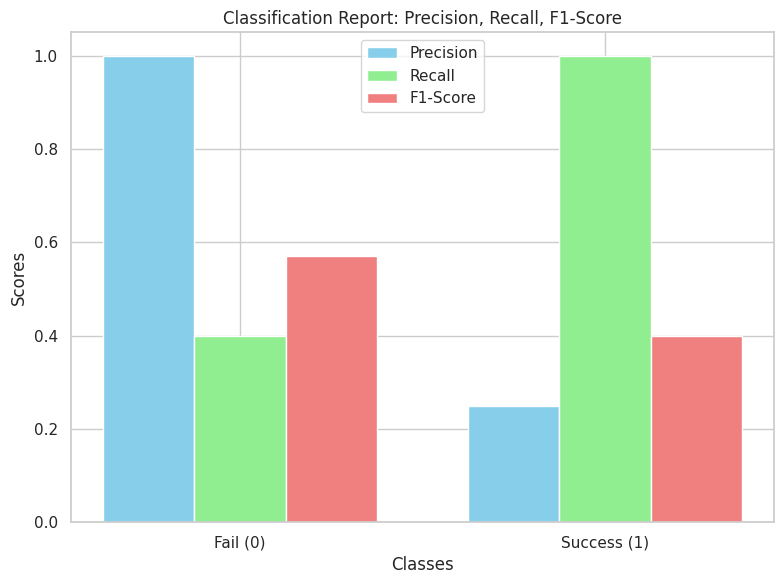

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

# Define classification report as a dictionary
classification_rep = {
    'precision': [1.00, 0.25],   # Precision for Fail (0) and Success (1)
    'recall': [0.40, 1.00],      # Recall for Fail (0) and Success (1)
    'f1-score': [0.57, 0.40]     # F1-Score for Fail (0) and Success (1)
}

# Class names (0 and 1)
labels = ['Fail (0)', 'Success (1)']

# Set up the plot
x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(8, 6))

# Plotting each metric
ax.bar(x - width, classification_rep['precision'], width, label='Precision', color='skyblue')
ax.bar(x, classification_rep['recall'], width, label='Recall', color='lightgreen')
ax.bar(x + width, classification_rep['f1-score'], width, label='F1-Score', color='lightcoral')

# Adding labels and title
ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Classification Report: Precision, Recall, F1-Score')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

Training Accuracy: 0.95
Test Accuracy: 0.5


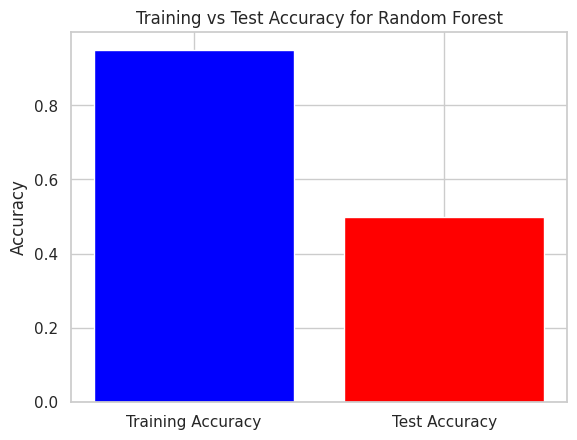

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Random Forest model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

# Predict on train and test data
train_accuracy = accuracy_score(y_train, model.predict(X_train_scaled))
test_accuracy = accuracy_score(y_test, model.predict(X_test_scaled))

# Print results
print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

# Plot training vs test accuracy as a single comparison
plt.bar(['Training Accuracy', 'Test Accuracy'], [train_accuracy, test_accuracy], color=['blue', 'red'])
plt.ylabel('Accuracy')
plt.title('Training vs Test Accuracy for Random Forest')
plt.show()

Training Loss: 0.18092682831914042
Test Loss: 1.2316807661924514


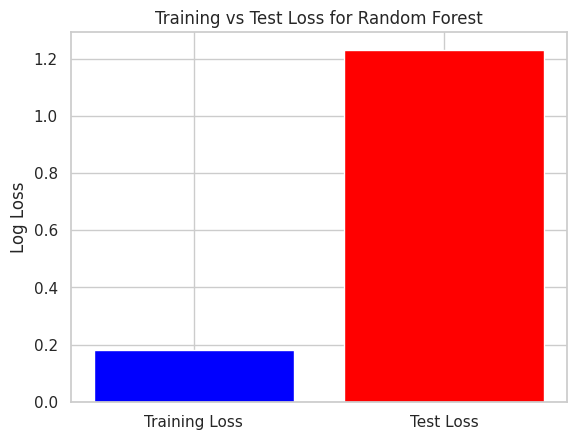

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss
import numpy as np
import matplotlib.pyplot as plt

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Scale data (optional)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Random Forest model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

# Predict probability for train and test data
train_probs = model.predict_proba(X_train_scaled)
test_probs = model.predict_proba(X_test_scaled)

# Calculate log loss for training and test data
train_loss = log_loss(y_train, train_probs)
test_loss = log_loss(y_test, test_probs)

# Print results
print(f"Training Loss: {train_loss}")
print(f"Test Loss: {test_loss}")

# Plot training vs test loss as a comparison
plt.bar(['Training Loss', 'Test Loss'], [train_loss, test_loss], color=['blue', 'red'])
plt.ylabel('Log Loss')
plt.title('Training vs Test Loss for Random Forest')
plt.show()

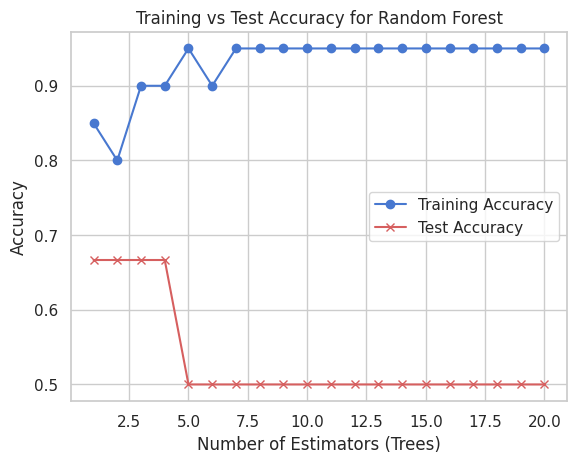

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Assuming X_resampled and y_resampled are your features and target variables
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize RandomForestClassifier
model = RandomForestClassifier(random_state=42)
train_accuracies = []
test_accuracies = []

# Training the model for each number of estimators (trees)
for n in range(1, 21):  # Iterate over 1 to 20 estimators
    model.n_estimators = n  # Change the number of trees
    model.fit(X_train, y_train)

    # Calculate training accuracy
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    train_accuracies.append(train_accuracy)

    # Calculate test accuracy
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    test_accuracies.append(test_accuracy)

# Plotting Training & Test Accuracy vs Number of Estimators
plt.plot(range(1, 21), train_accuracies, marker='o', color='b', label='Training Accuracy')
plt.plot(range(1, 21), test_accuracies, marker='x', color='r', label='Test Accuracy')
plt.xlabel('Number of Estimators (Trees)')
plt.ylabel('Accuracy')
plt.title('Training vs Test Accuracy for Random Forest')
plt.grid(True)
plt.legend()
plt.show()


Overfitting Found - Random Forest models tend to overfit the training data which means the model performs very well on the training data, but struggles to generalize to unseen data (test set).

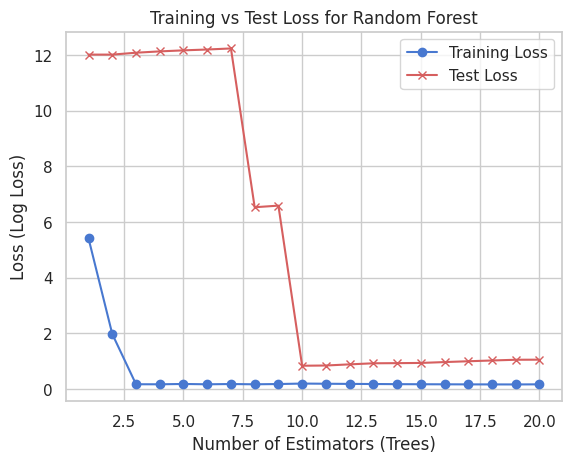

In [ ]:
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

# Initialize RandomForestClassifier
model = RandomForestClassifier(random_state=42)
train_losses = []
test_losses = []

# Training the model for each number of estimators (trees)
for n in range(1, 21):  # Iterate over 1 to 20 estimators
    model.n_estimators = n  # Change the number of trees
    model.fit(X_train, y_train)

    # Calculate training loss (log loss)
    y_train_pred = model.predict_proba(X_train)  # Predicted probabilities for training set
    train_loss = log_loss(y_train, y_train_pred)
    train_losses.append(train_loss)

    # Calculate test loss (log loss)
    y_test_pred = model.predict_proba(X_test)  # Predicted probabilities for test set
    test_loss = log_loss(y_test, y_test_pred)
    test_losses.append(test_loss)

# Plotting Training & Test Loss vs Number of Estimators
plt.plot(range(1, 21), train_losses, marker='o', color='b', label='Training Loss')
plt.plot(range(1, 21), test_losses, marker='x', color='r', label='Test Loss')
plt.xlabel('Number of Estimators (Trees)')
plt.ylabel('Loss (Log Loss)')
plt.title('Training vs Test Loss for Random Forest')
plt.grid(True)
plt.legend()
plt.show()

Using different model, Logistic Regression to check again the data accuracy for better suited with the simplicity of the problem predicting "Success" or "Failure" of theft attempt.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE  # SMOTE for oversampling the minority class
from sklearn.preprocessing import LabelEncoder  # For label encoding the target variable
from sklearn.impute import SimpleImputer  # For handling missing values

# Clean column names
data.columns = data.columns.str.replace(' ', '_').str.replace(',', '').str.replace('(', '').str.replace(')', '')

# Step 1: Extract day of week, month, and hour from Date and Time
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')  # Convert 'Date' to datetime
data['Time'] = pd.to_datetime(data['Time'], errors='coerce').dt.strftime('%H:%M')  # Ensure 'Time' is in proper format

# Extract features from Date and Time
data['Day_of_Week'] = data['Date'].dt.dayofweek
data['Hour_of_Day'] = pd.to_datetime(data['Time'], format='%H:%M').dt.hour

# Step 2: One-Hot Encoding of categorical variables
data_encoded = pd.get_dummies(data, columns=['Security_System_Performance', 'Method_of_Attempt'], drop_first=True)

# Step 3: Define features (X) and target (y)
X = data_encoded.drop(columns=['Success_or_Fail', 'Date', 'Time'])  # Drop target and datetime columns
y = data_encoded['Success_or_Fail']

# Step 4: Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Using mean imputation for numerical columns
X_imputed = imputer.fit_transform(X)

# Step 5: Encode the target variable (y) using LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Converts 'Fail' to 0 and 'Success' to 1

# Step 6: Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_imputed, y_encoded)

# Step 7: Train a Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000, random_state=42)
logreg_model.fit(X_resampled, y_resampled)

# Step 8: Perform cross-validation to get a better performance estimate
cv_scores = cross_val_score(logreg_model, X_resampled, y_resampled, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

# Step 9: Evaluate the model on the test set
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
y_pred = logreg_model.predict(X_test)

# Step 10: Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

<ipython-input-67-931508ae7afb>:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Time'] = pd.to_datetime(data['Time'], errors='coerce').dt.strftime('%H:%M')  # Ensure 'Time' is in proper format


Cross-Validation Accuracy Scores: [0.83333333 0.6        0.6        0.6        0.4       ]
Mean Accuracy: 0.6066666666666667
Accuracy: 0.6666666666666666
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.33      1.00      0.50         1

    accuracy                           0.67         6
   macro avg       0.67      0.80      0.62         6
weighted avg       0.89      0.67      0.71         6



The results have improved with the use of Logistic Regression and cross-validation, showing an accuracy of 66.67% and a mean accuracy of 60.67% from cross-validation. Precision for 'Fail' is 1.00, but its recall is 0.60. This indicates that while the model is good at identifying 'Fail' when it predicts it, it's still missing some instances. Precision for 'Success' is 0.33, but its recall is 1.00, meaning the model is good at identifying when a theft attempt is successful but struggles with precision.

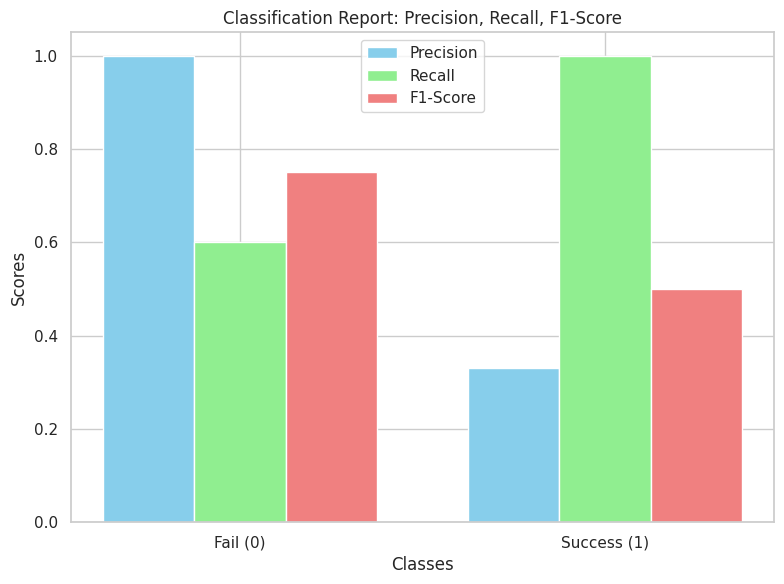

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define classification report as a dictionary
classification_rep = {
    'precision': [1.00, 0.33],   # Precision for Fail (0) and Success (1)
    'recall': [0.60, 1.00],      # Recall for Fail (0) and Success (1)
    'f1-score': [0.75, 0.50]     # F1-Score for Fail (0) and Success (1)
}

# Class names (0 and 1)
labels = ['Fail (0)', 'Success (1)']

# Set up the plot
x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(8, 6))

# Plotting each metric
ax.bar(x - width, classification_rep['precision'], width, label='Precision', color='skyblue')
ax.bar(x, classification_rep['recall'], width, label='Recall', color='lightgreen')
ax.bar(x + width, classification_rep['f1-score'], width, label='F1-Score', color='lightcoral')

# Adding labels and title
ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Classification Report: Precision, Recall, F1-Score')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

The model is very good at predicting 'Fail' instances, with perfect precision but lower recall. However, it struggles with 'Success' instances, achieving perfect recall but low precision, meaning it predicts 'Success' too often, including many incorrect predictions. The overall accuracy of 66.67% is decent given the imbalance between the two classes, with the model favoring the 'Fail' class.

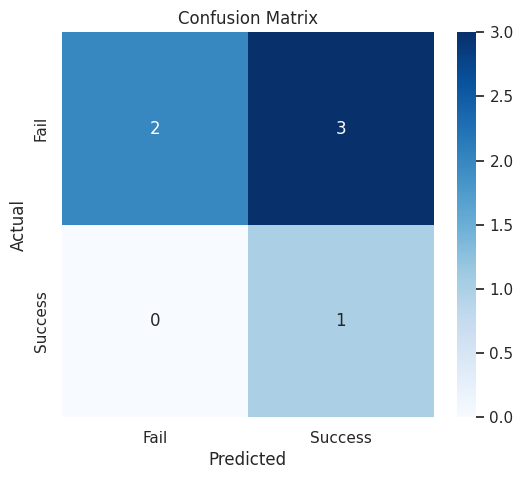

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Fail', 'Success'], yticklabels=['Fail', 'Success'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Training Accuracy: 0.85
Test Accuracy: 0.6666666666666666


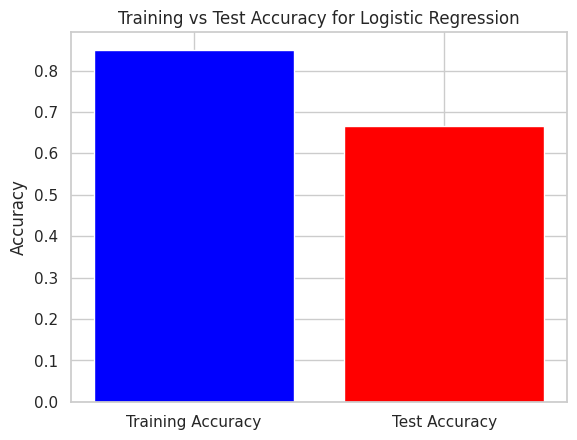

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Logistic Regression with increased max_iter and solver 'saga'
model = LogisticRegression(random_state=42, max_iter=1000, solver='saga')

# Train the model
model.fit(X_train_scaled, y_train)

# Predict on train and test data
train_accuracy = accuracy_score(y_train, model.predict(X_train_scaled))
test_accuracy = accuracy_score(y_test, model.predict(X_test_scaled))

# Print results
print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

# Plot training vs test accuracy as a single comparison
plt.bar(['Training Accuracy', 'Test Accuracy'], [train_accuracy, test_accuracy], color=['blue', 'red'])
plt.ylabel('Accuracy')
plt.title('Training vs Test Accuracy for Logistic Regression')
plt.show()


Training Loss: 0.31448803273570786
Test Loss: 1.1038993368121102


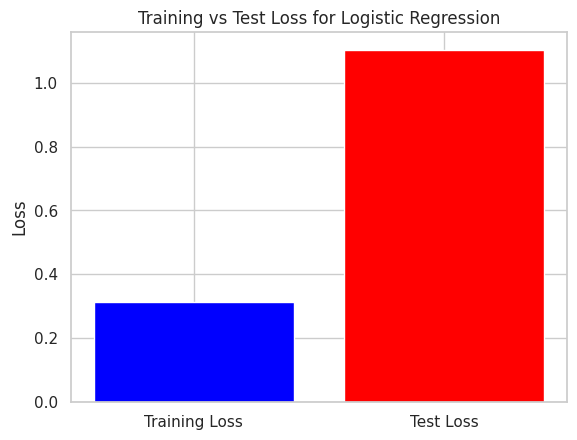

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Logistic Regression with increased max_iter and solver 'saga'
model = LogisticRegression(random_state=42, max_iter=1000, solver='saga')

# Train the model
model.fit(X_train_scaled, y_train)

# Predict probabilities on train and test data
train_probabilities = model.predict_proba(X_train_scaled)
test_probabilities = model.predict_proba(X_test_scaled)

# Calculate log loss for both training and test data
train_loss = log_loss(y_train, train_probabilities)
test_loss = log_loss(y_test, test_probabilities)

# Print results
print(f"Training Loss: {train_loss}")
print(f"Test Loss: {test_loss}")

# Plot training vs test loss as a single comparison
plt.bar(['Training Loss', 'Test Loss'], [train_loss, test_loss], color=['blue', 'red'])
plt.ylabel('Loss')
plt.title('Training vs Test Loss for Logistic Regression')
plt.show()